In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker
import numpy as np


In [2]:
df = pd.read_csv('./data/penguins.csv')


In [3]:
# Adelie, Gentoo, Chinstrap
df['label'] = df['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})

# NaN を含む行を削除
df = df.dropna()

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0


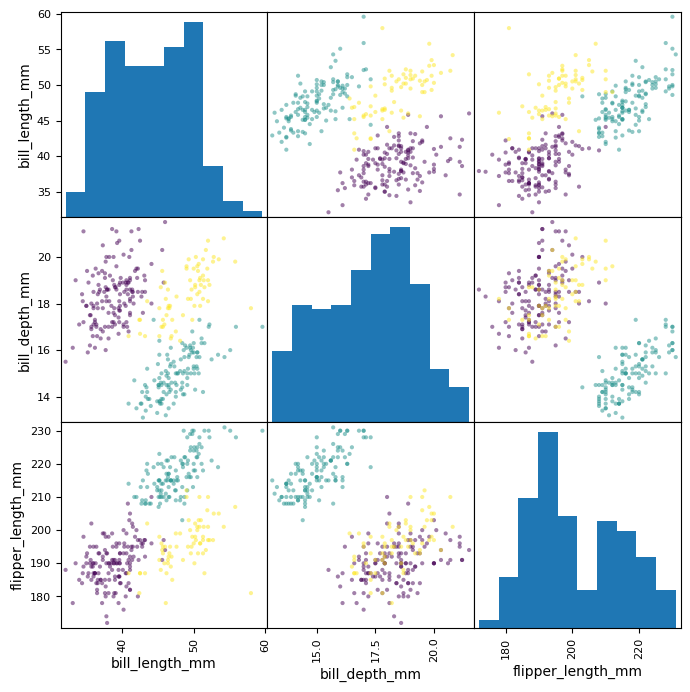

In [4]:
plotting.scatter_matrix(df.iloc[:, 2:5], figsize=(8, 8), c=list(df.iloc[:, -1]), alpha=0.5)
plt.show()


In [5]:
# 行列の標準化
dfs = df.iloc[:, 2:5].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm
0,-0.894695,0.779559,-1.424608
1,-0.821552,0.119404,-1.067867
2,-0.675264,0.424091,-0.425733
4,-1.333559,1.084246,-0.568429
5,-0.858123,1.744400,-0.782474


In [6]:
# 主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

# 主成分得点
pd.DataFrame(
    feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]
).head()


,PC1,PC2,PC3
0,-1.831214,-0.050183,0.286072
1,-1.218405,-0.487377,0.327865
2,-0.869748,-0.137881,-0.203982
3,-1.663986,-0.076020,-0.708837
4,-1.880194,0.725727,-0.574251


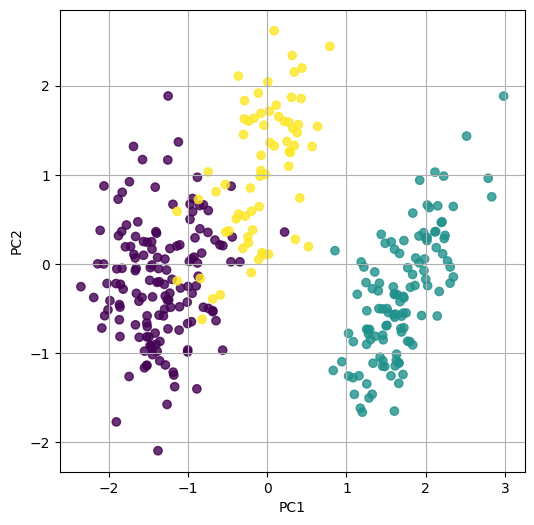

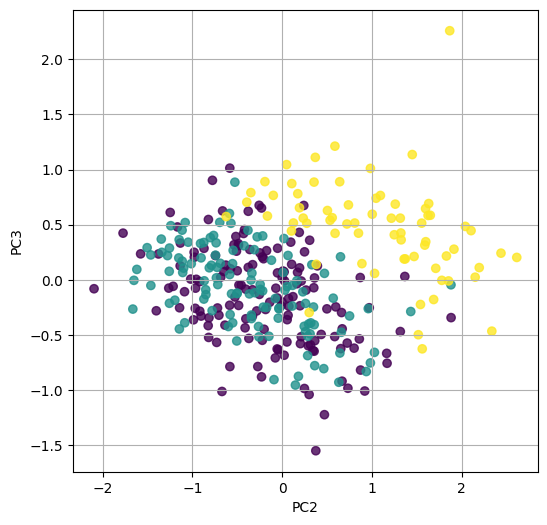

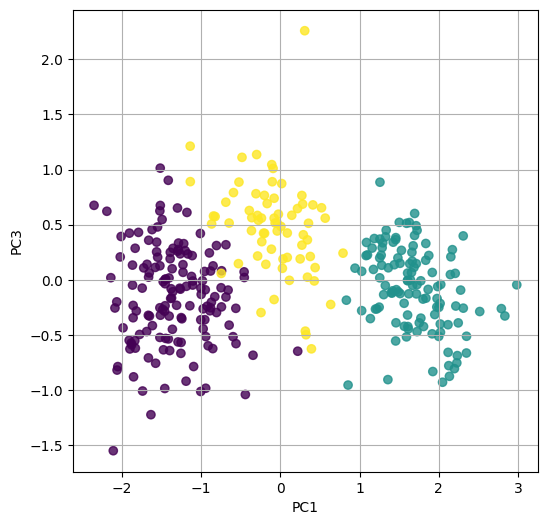

In [7]:
# 第一主成分と第二主成分でプロットする
def plot(pc_a, pc_b):
    plt.figure(figsize=(6, 6))
    plt.scatter(feature[:, pc_a - 1], feature[:, pc_b - 1], alpha=0.8, c=list(df.iloc[:, -1]))
    plt.grid()
    plt.xlabel(f"PC{pc_a}")
    plt.ylabel(f"PC{pc_b}")
    plt.show()

plot(1, 2)
plot(2, 3)
plot(1, 3)


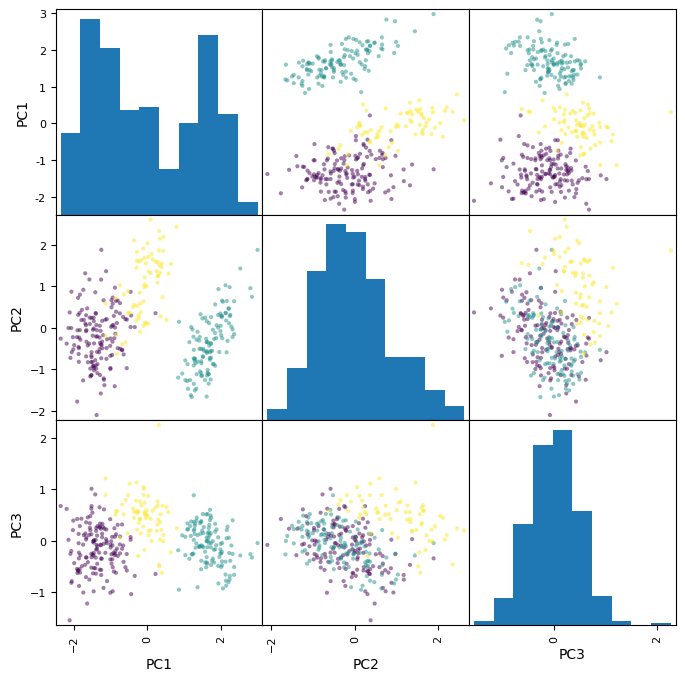

In [8]:
plotting.scatter_matrix(
    pd.DataFrame(
        feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]
    ),
    figsize=(8, 8),
    c=list(df.iloc[:, -1]),
    alpha=0.5,
)
plt.show()


In [9]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])


,0
PC1,0.664389
PC2,0.257782
PC3,0.077829


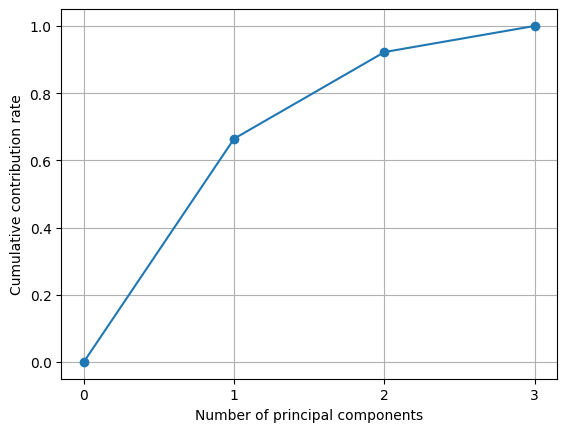

In [10]:
# 累積寄与率を図示する
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()


In [11]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])


,0
PC1,1.993166
PC2,0.773347
PC3,0.233487


In [12]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[2:5], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])


,bill_length_mm,bill_depth_mm,flipper_length_mm
PC1,0.551363,-0.510704,0.659682
PC2,0.654936,0.754781,0.036931
PC3,0.516776,-0.411687,-0.750637


In [13]:
# # 第一主成分と第二主成分における観測変数の寄与度をプロットする
# plt.figure(figsize=(6, 6))
# for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[1:]):
#     plt.text(x, y, name)
# plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
# plt.grid()
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.show()

# # 第一主成分と第二主成分における観測変数の寄与度をプロットする
# plt.figure(figsize=(6, 6))
# for x, y, name in zip(pca.components_[0], pca.components_[2], df.columns[2:]):
#     plt.text(x, y, name)
# plt.scatter(pca.components_[0], pca.components_[2], alpha=0.8)
# plt.grid()
# plt.xlabel("PC1")
# plt.ylabel("PC3")
# plt.show()

# # 第一主成分と第二主成分における観測変数の寄与度をプロットする
# plt.figure(figsize=(6, 6))
# for x, y, name in zip(pca.components_[1], pca.components_[2], df.columns[2:]):
#     plt.text(x, y, name)
# plt.scatter(pca.components_[1], pca.components_[2], alpha=0.8)
# plt.grid()
# plt.xlabel("PC2")
# plt.ylabel("PC3")
# plt.show()

In [ ]:
| island | ペンギンが生息する島の名前('Torgersen', 'Biscoe', 'Dream') |
| bill_length_mm | ペンギンのくちばしの長さ(mm) |
| bill_depth_mm | ペンギンのくちばしの奥行き(mm) |
| flipper_length_mm | ペンギンのヒレの長さ(mm) |
| body_mass_g | ペンギンの体重(g) |
| sex | ペンギンの性別('Male', 'Female') |
| species | ペンギンの種類('Adelie', 'Chinstrap', 'Gentoo') |
| year | データが収集された年 |

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns


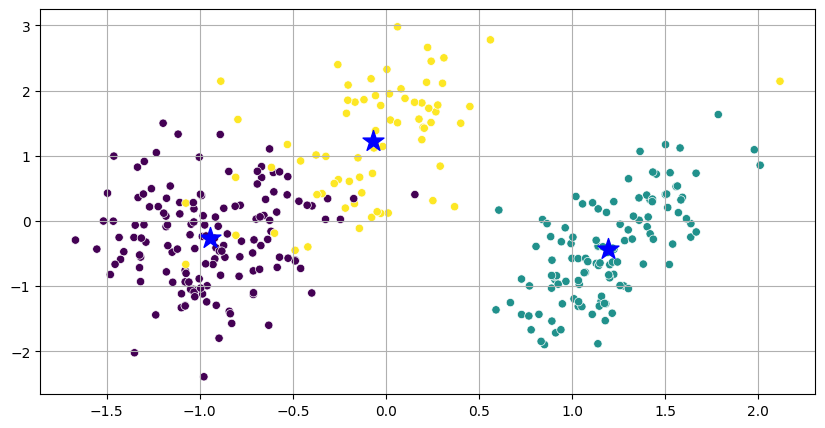

In [20]:
# クラスタリング（k-means）
def clustering(df, num):
    sc = StandardScaler()
    sc.fit_transform(df)
    data_norm = sc.transform(df)

    cls = KMeans(n_clusters=num)
    result = cls.fit(data_norm)

    plt.figure(figsize=[10, 5])
    sns.scatterplot(x=data_norm[:, 0], y=data_norm[:, 1], c=result.labels_)
    plt.scatter(
        result.cluster_centers_[:, 0],
        result.cluster_centers_[:, 1],
        s=250,
        marker="*",
        c="blue",
    )
    plt.grid()
    plt.show()


# DataFrameに変換
feature_df = pd.DataFrame(
    feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]
)

# ワインデータ
clustering(feature_df, 3)